<a href="https://colab.research.google.com/github/bupe1800/Human-Resources/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Employee Retention**

-----
Wikipedia defines **Employee retention** as the ability of an organization to retain its employees. Employees leaving the company is more costly to the company as it brings about costs in the process of interviewing to finally finding a suitable replacemennt, the company is also expected to lose productivy while the new employee gets comfortable to the new role. However, employee retention is fast becoming a key competitor deferentiator among organizations. 

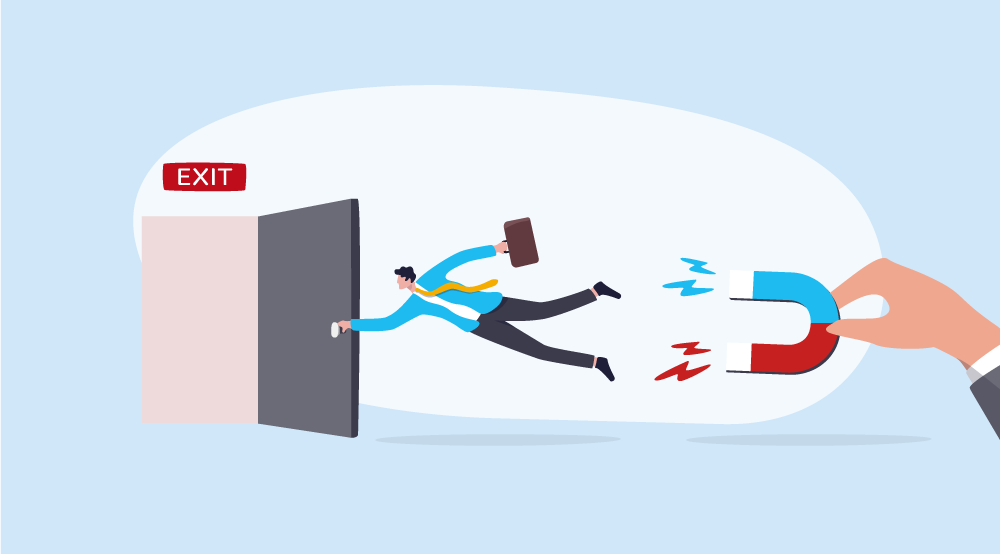

##**Problem Statement**
-----
Given the data from the HR Management the company can be able to understand why and when an employer is likely to leave the company, this will therefore enable the Management to come up with efficient business-decisions/strategies to retain its employees, equally planning new recruitments on time.

From the data science point of view the following are the questions the HR management team set on the table to solve this proble;

1. What is the probability of an employer leaving the company?
2. What are the key factors contributing to employees leaving the company?
3. Based on the results, what are the strategies that can be adopted to improve employee retention.

###**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
import seaborn as sns 
# Standard plotly imports
#from plotly import plotly as py
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

###**Loading the data**

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/bupe1800/Human-Resources/main/HR_comma_sep.csv')
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


###**Data Exploration**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data.shape

(14999, 10)

In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

The data provided has 14,999 rows representing employees and 10 columns reprent each employees personal information, there are also no missing values in this data, this is likely beacause HR Departments typically have all personal and employment data on-file, and this type of data is kept as accurate as possible. We can therefore just rename the column names into something simpler.

In [6]:
data = data.rename(columns= {'satisfaction_level': 'Satisfaction', 'last_evaluation':'Evaluation',
                             'number_project': 'Projects', 'average_montly_hours':'Average_Montly_Hours',
                             'time_spend_company':'Years','Work_accident':'Accident',
                             'promotion_last_5years':'Promotion','Department':'Department',
                             'salary':'Salary','left':'Turnover'})
data.head(3)

,Satisfaction,Evaluation,Projects,Average_Montly_Hours,Years,Accident,Turnover,Promotion,Department,Salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


###**Exploratory Data Analysis**

In [7]:
data.describe()

,Satisfaction,Evaluation,Projects,Average_Montly_Hours,Years,Accident,Turnover,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


The mean satisfaction of employees in the company is 61%

In [8]:
TurnoverRate = data.Turnover.value_counts()/len(data)
TurnoverRate

0    0.761917
1    0.238083
Name: Turnover, dtype: float64

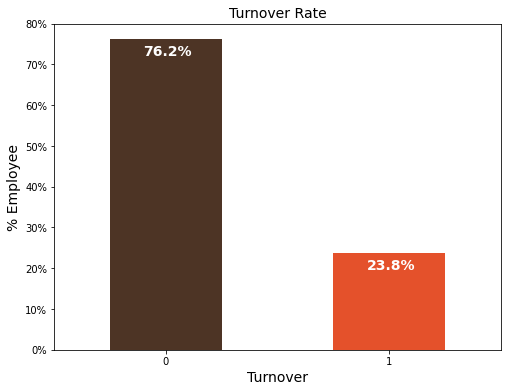

In [9]:
colors = ['#4D3425','#E4512B']
ax = (data['Turnover'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Employee',size = 14)
ax.set_xlabel('Turnover',size = 14)
ax.set_title('Turnover Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

The Turnover rate in this company stands at 24%

In [10]:
TurnOver = data.groupby('Turnover')
TurnOver.mean()

,Satisfaction,Evaluation,Projects,Average_Montly_Hours,Years,Accident,Promotion
Turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Employees that are less than 45% satisfied tend to leave the company compared to those who are atleast 65% satisfied. Also notice that it is those who work for long hours and are rarely promoted are the ones leaving the company.

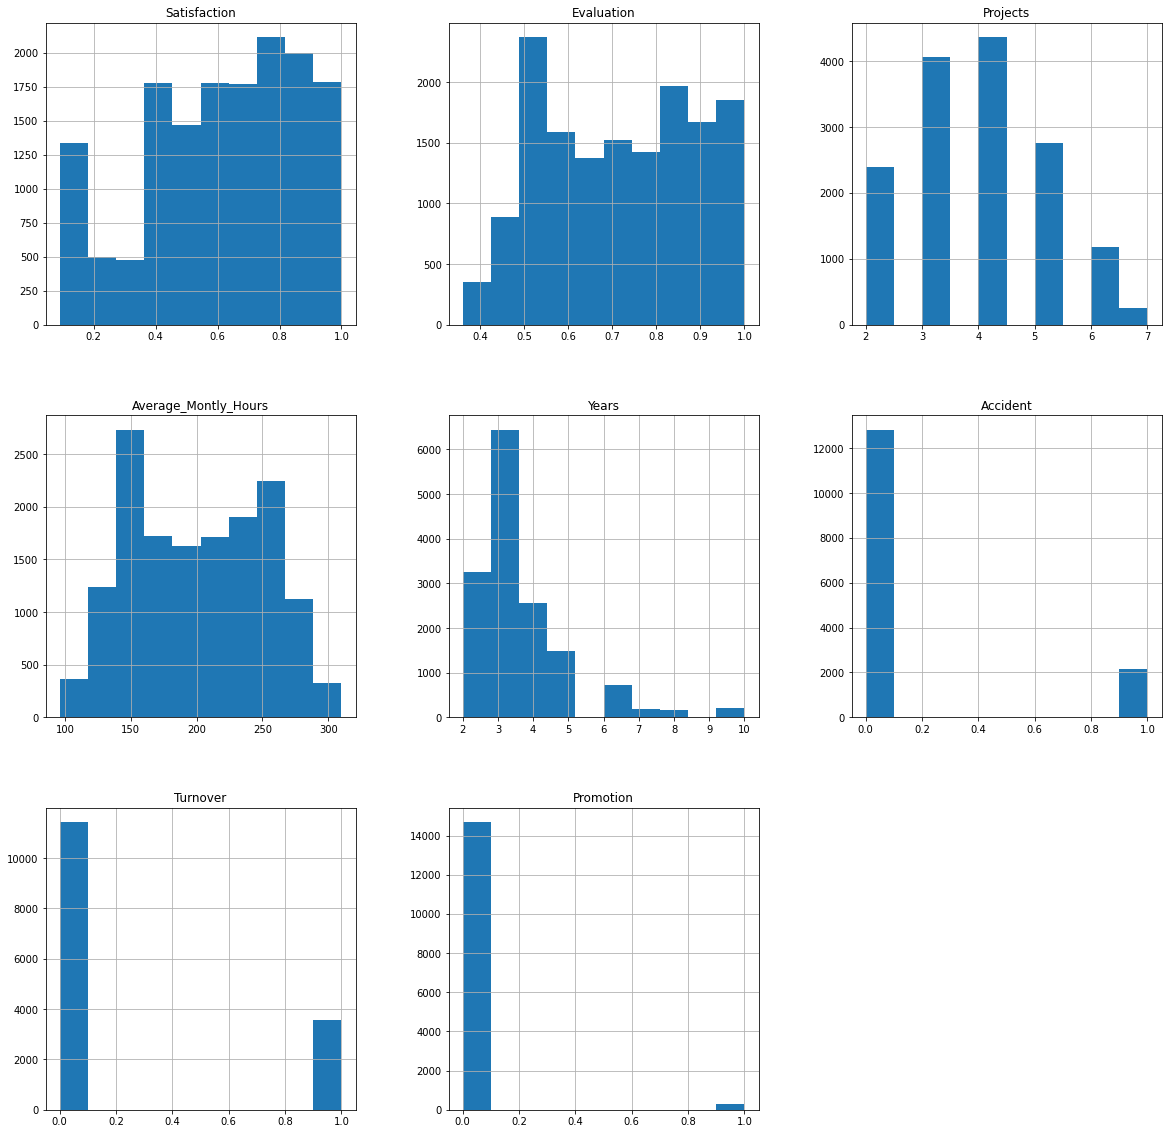

In [11]:
data.hist(figsize=(20,20))
plt.show()

,Satisfaction,Evaluation,Projects,Average_Montly_Hours,Years,Accident,Turnover,Promotion
Satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
Projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
Average_Montly_Hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
Years,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
Turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
Promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


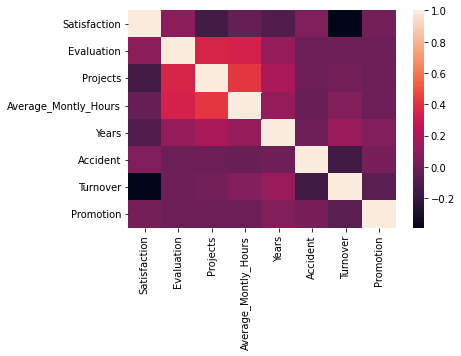

In [12]:
#Correlation Matrix
corr = data.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

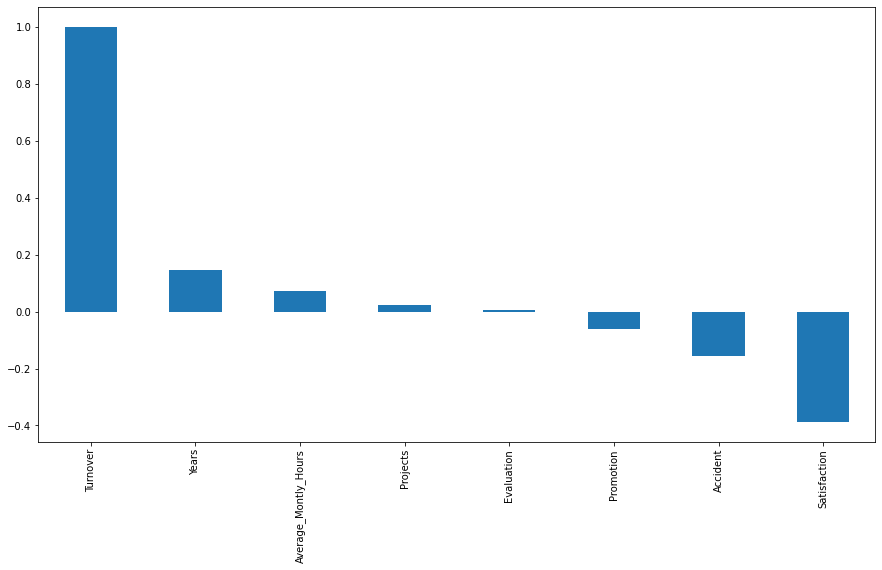

In [13]:
#Correlation of "Turnover" with other variables:
plt.figure(figsize=(15,8))
data.corr()['Turnover'].sort_values(ascending = False).plot(kind='bar')

From the correlation heatmap, we can care to look at the variables(Average_Monthly_Hours, Projects and Evaluation). The 3 variables are positively correlated with each other, and this means, employee who worked for many hours and a lot of projects were highly evaluated.

However number of years at the company and Average monthly hours seem to be positively correlated with Turnover. While, Promotion, Accidents seem to be negatively correlated with Turnover. Satisfaction is the most negatively correlated variable with turnover, this implies that the less satisfied employees tend to leave this company.

####**Turnover Vs Department**

In [14]:
# The organisation consists of several departments
data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

Text(0.5, 1.0, '# of Employees by Department')

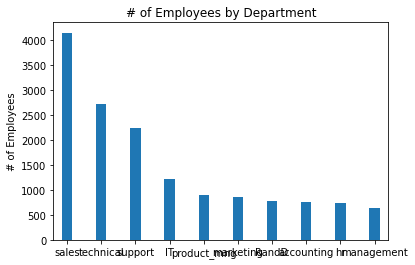

In [15]:
ax = data['Department'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Employees')
ax.set_title('# of Employees by Department')

The company consists of several departments with most employees in the sales department, followed by the technical department. Management has the least number of employees.

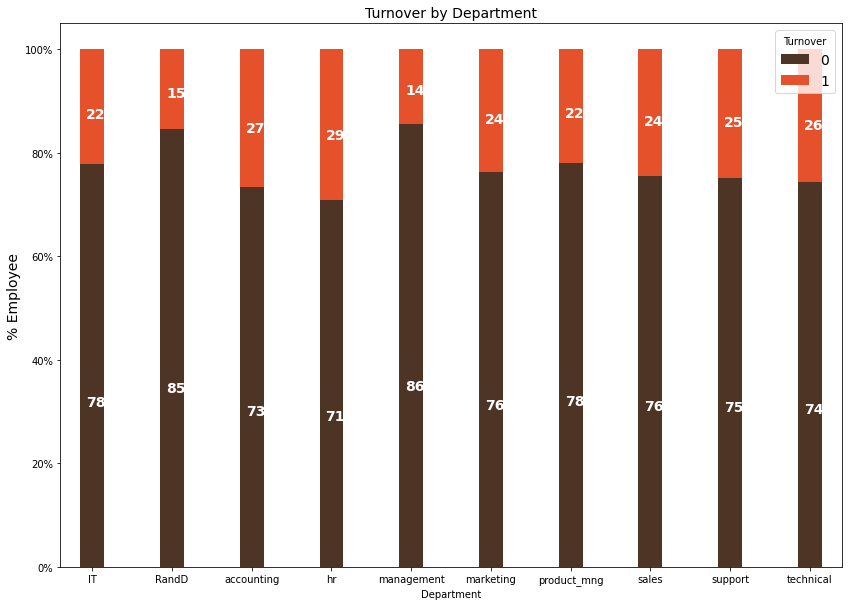

In [16]:
colors = ['#4D3425','#E4512B']
Depart_Turnover = data.groupby(['Department','Turnover']).size().unstack()

ax = (Depart_Turnover.T*100.0 / Depart_Turnover.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,10),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Turnover')
ax.set_ylabel('% Employee',size = 14)
ax.set_title('Turnover by Department',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

The HR, Accounting, technical, support and sales department are the leading departments in employees churning rate respectively. The management department has the least turnover. 
With more information on each department, we can exactly know the main cause for employee turnover in each department.

####**Turnover Vs Salary**

In [17]:
data['Salary'].value_counts()

low       7316
medium    6446
high      1237
Name: Salary, dtype: int64

Text(0.5, 1.0, '# of Employees by Salary')

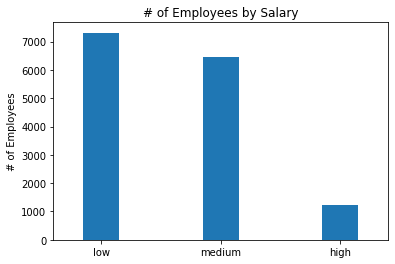

In [18]:
ax = data['Salary'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Employees')
ax.set_title('# of Employees by Salary')

The salary is categorized in three groups, most of the employees have a low salary followed by the medium. Only a small number of employees were on a high salary.

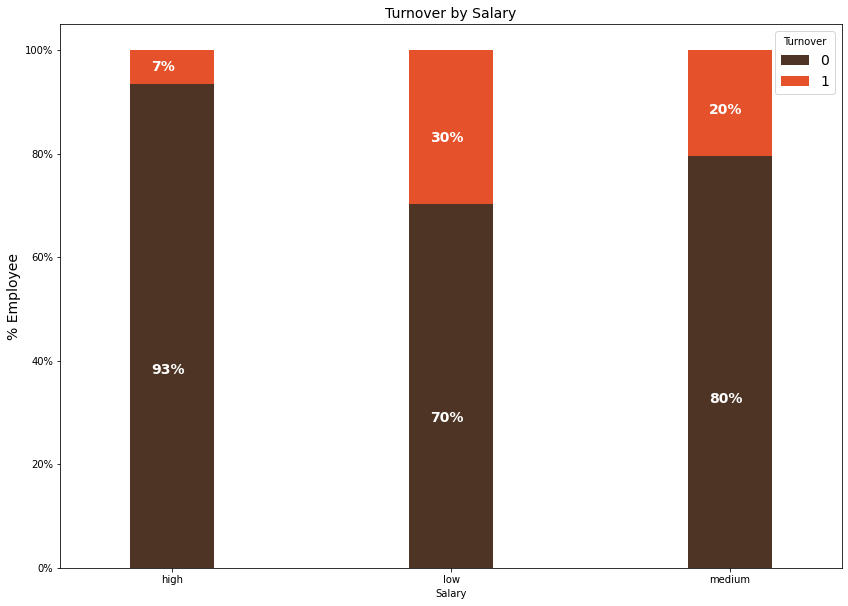

In [19]:
colors = ['#4D3425','#E4512B']
Salary_Turnover = data.groupby(['Salary','Turnover']).size().unstack()

ax = (Salary_Turnover.T*100.0 / Salary_Turnover.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,10),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Turnover')
ax.set_ylabel('% Employee',size = 14)
ax.set_title('Turnover by Salary',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

High number of turnover is recorded with employees who are in the low salary category, while only 7% of employees with a high salary leave this company.

####**Turnover Vs Projects**

In [20]:
data['Projects'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: Projects, dtype: int64

Text(0.5, 1.0, '# of Employees by Projects')

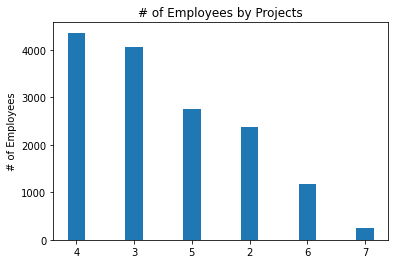

In [21]:
ax = data['Projects'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Employees')
ax.set_title('# of Employees by Projects')

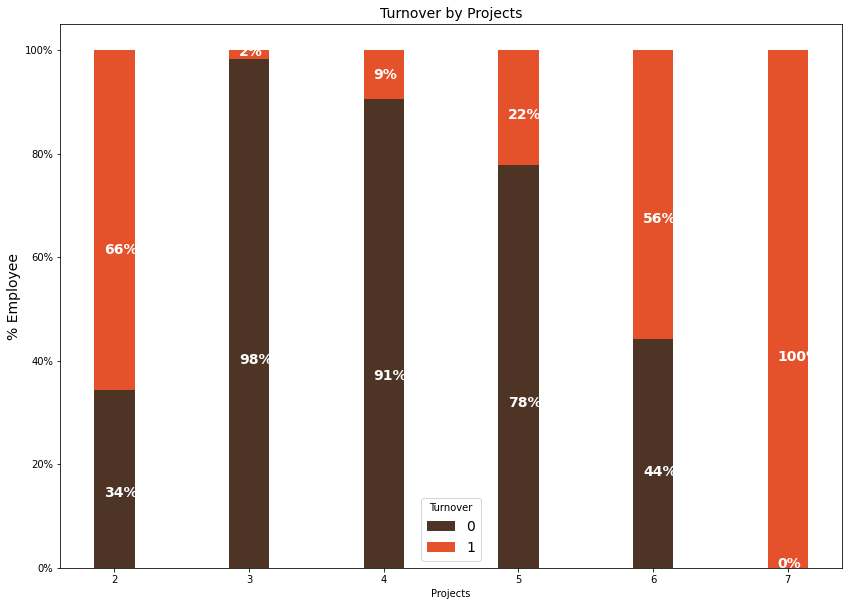

In [22]:
colors = ['#4D3425','#E4512B']
Projects_Turnover = data.groupby(['Projects','Turnover']).size().unstack()

ax = (Projects_Turnover.T*100.0 / Projects_Turnover.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,10),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Turnover')
ax.set_ylabel('% Employee',size = 14)
ax.set_title('Turnover by Projects',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

More than half of the employees with 2,6, and 7 projects are leaving the company, interestingly, all the employees with 7 projects leave the company, followed by 66% of those with only 2 projects. Many employees who do not leave the company have 3,4 and 5 projects respectively.

####**Turnover Vs Years**

In [23]:
data['Years'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: Years, dtype: int64

Text(0.5, 1.0, '# of Employees by Years')

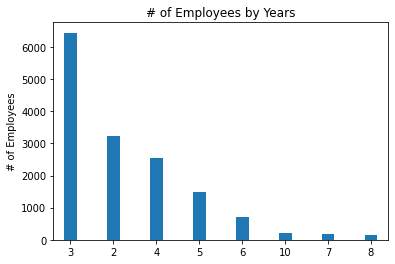

In [24]:
ax = data['Years'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Employees')
ax.set_title('# of Employees by Years')

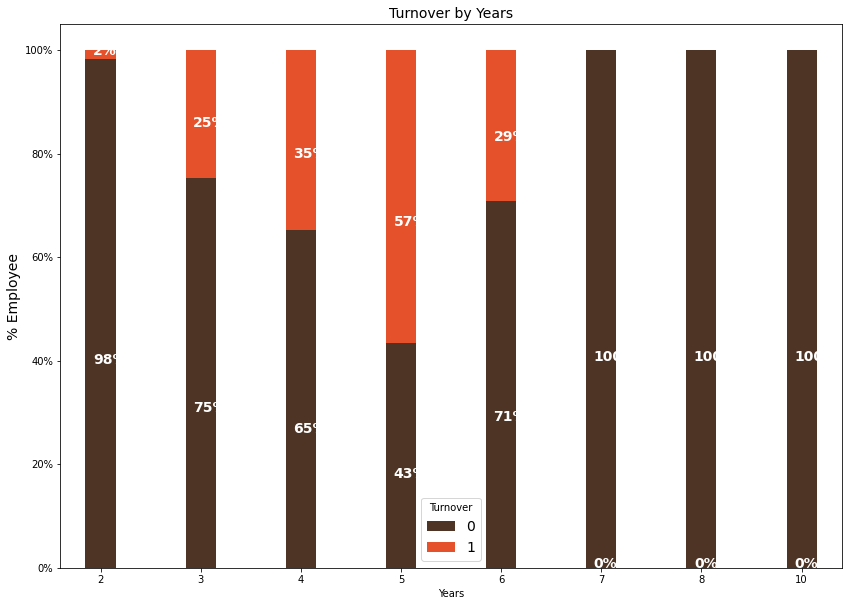

In [25]:
colors = ['#4D3425','#E4512B']
Years_Turnover = data.groupby(['Years','Turnover']).size().unstack()

ax = (Years_Turnover.T*100.0 / Years_Turnover.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (14,10),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Turnover')
ax.set_ylabel('% Employee',size = 14)
ax.set_title('Turnover by Years',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Notice that employees leaving the company have worked for 3 to 6 yrs, with most of them working for 5 years,

####**Turnover Vs Evaluation**

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

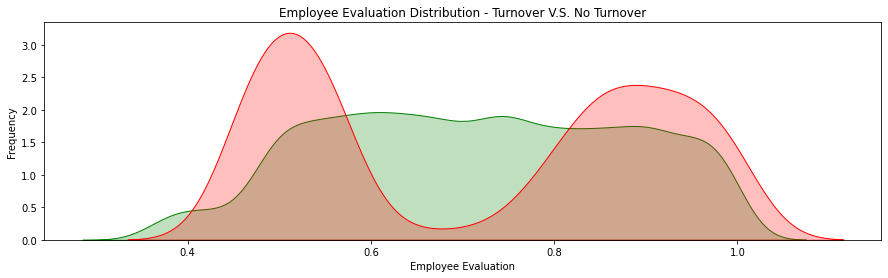

In [26]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(data.loc[(data['Turnover'] == 0),'Evaluation'] , color='g',shade=True,label='no turnover')
ax=sns.kdeplot(data.loc[(data['Turnover'] == 1),'Evaluation'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

We can se that employees being evaluated in the ranges 0.4-0.6 and 0.8-1.0 tend to leave the company. This represents a bimodal distribution, meaning both employees who are low and highly evaluated leave the company leaving the best evaluation spot in the range 0.6-0.8.

####**Turnover Vs Average Monthly Hours**

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

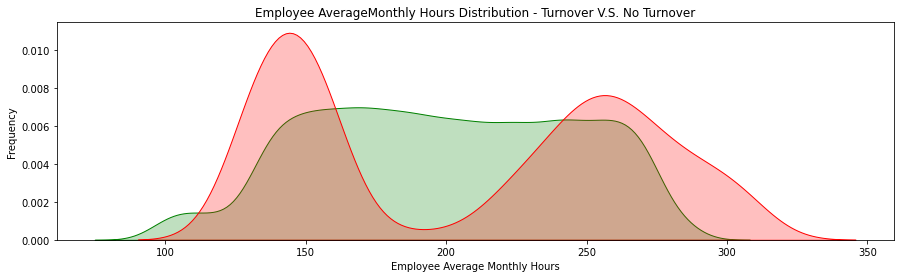

In [27]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Turnover'] == 0),'Average_Montly_Hours'] , color='g',shade=True, label='no turnover')
ax=sns.kdeplot(data.loc[(data['Turnover'] == 1),'Average_Montly_Hours'] , color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

We can se that employees leaving the company are either underworked(less 150hrs) or overworked(more than 250hrs).

####**Turnover Vs Satisfaction**

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

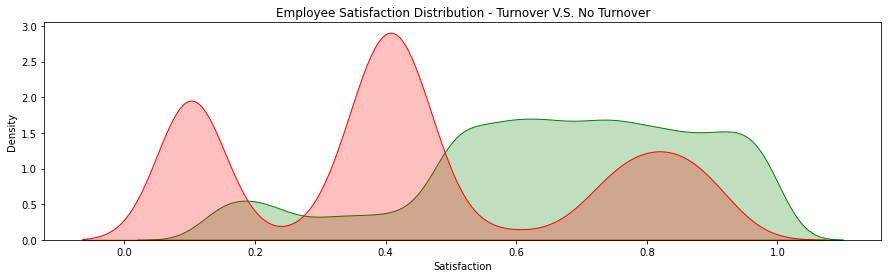

In [28]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Turnover'] == 0),'Satisfaction'] , color='g',shade=True, label='no turnover')
ax=sns.kdeplot(data.loc[(data['Turnover'] == 1),'Satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')

We can see a trimodal distribution showing that employees who were less satisfied left the company, however more employees with low satisfaction between 0.3 and 0.5 left the company. We can also see that employees with high satisfaction also left the company.

####**Satisfaction Vs Evaluation**

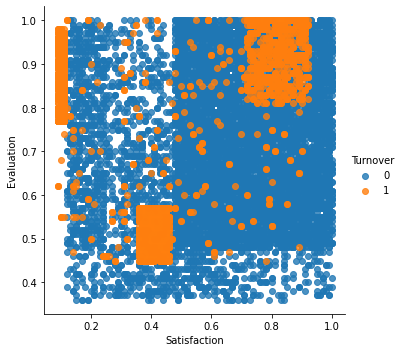

In [29]:
sns.lmplot(x='Satisfaction', y='Evaluation', data=data,
           fit_reg=False, # No regression line
           hue='Turnover')   # Color by evolution stage

This shows u the 3 main clusters of employees who left the company based on evaluation and satisfaction.

1. **Highly evaluated and unsatisfied**: these are employees with a satisfaction level of less than 0.2 and were evaluated over 0.75.
2. **Low evaluated and unsatisfied** these are employees with a satisfaction level below 0.5 and are evaluated below 0.6.
3. **Highly evaluated and satisfied** these are employees with a satisfaction level above 0.7 and are evaluated above 0.8.

###**Data Modeling**

In [30]:
# unique values for each column containing a categorical feature
def unique_values():
  cat_columns = np.unique(data.select_dtypes('object').columns)
  for i in cat_columns:
    print(i, data[i].unique())

unique_values()

Department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary ['low' 'medium' 'high']


#### Data Preprocessing**

#####**Encoding**

Machine learning algorithms works better with numerical variables, therefore, there is need to convert categorical variables into dummy variables. using; 
* `LabelEncoder` for binary
* `get_dummies` for other categorical variables

In [31]:
#Converting the predictor variable in a binary numeric variable
#Let's convert all the categorical variables into dummy variables
data_dummies = pd.get_dummies(data)
data_dummies.head()

,Satisfaction,Evaluation,Projects,Average_Montly_Hours,Years,Accident,Turnover,Promotion,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#####**Scaling**

In [32]:
# We will use the data frame where we had created dummy variables
y = data_dummies['Turnover'].values
X = data_dummies.drop(columns = ['Turnover'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

##### Splitting data into training and testing sets

In [33]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=y)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (10499, 20)
Number transactions y_train dataset:  (10499,)
Number transactions X_test dataset:  (4500, 20)
Number transactions y_test dataset:  (4500,)


####**Building Machine Learning Models**

#####**1. Logistic Regression**

In [34]:
# Running logistic regression model
kfold = 10
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)

#Cross validation
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

#Fine tuning
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', 
                                         class_weight="balanced", 
                                         random_state=7),

                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

#fitting the model
log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)



AUC score (STD): 0.83 (0.01)
best params: LogisticRegression(C=1.9609999999999996, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 1.9609999999999996}
best score: 0.8279623335419274


#####**Evaluation**

Text(0.5, 257.44, 'Predicted label')

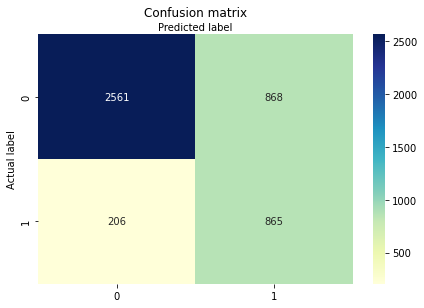

In [35]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      3429
           1       0.50      0.81      0.62      1071

    accuracy                           0.76      4500
   macro avg       0.71      0.78      0.72      4500
weighted avg       0.82      0.76      0.78      4500



In [37]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 76.13


In [38]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.830


#####**2. Random Forest Classifier**

In [39]:
# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))



 ---Random Forest Model---
Random Forest AUC = 0.97
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.94      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



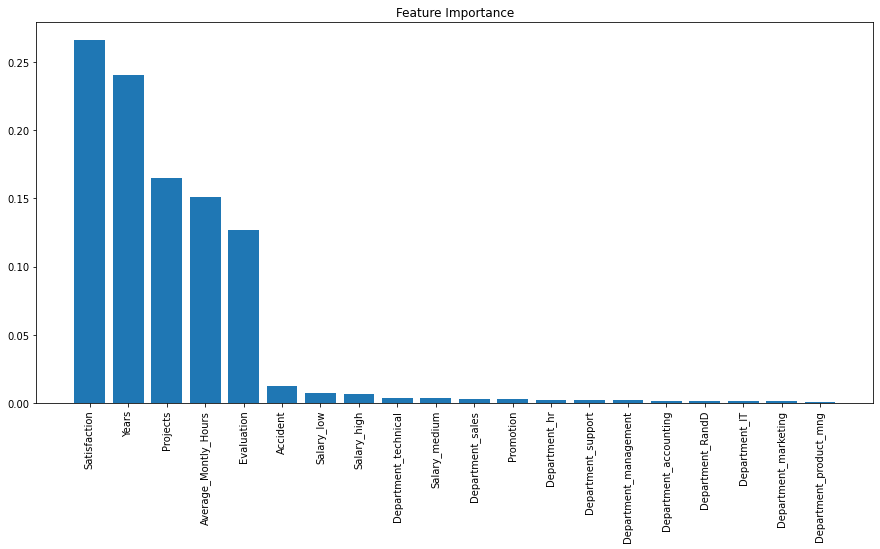

In [40]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [41]:
importances = rf.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(20):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,Satisfaction,0.265887
1,Years,0.240420
2,Projects,0.164844
3,Average_Montly_Hours,0.151306
4,Evaluation,0.126888
5,Accident,0.012415
6,Salary_low,0.007364
7,Salary_high,0.006560
8,Department_technical,0.003364
9,Salary_medium,0.003360


Text(0.5, 257.44, 'Predicted label')

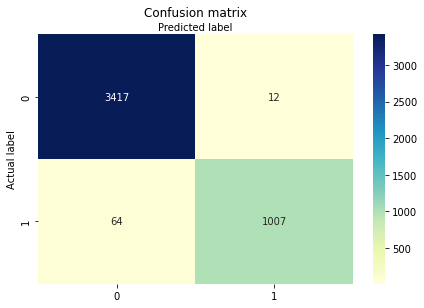

In [42]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
# Classification report for the optimised RF Regression
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3429
           1       0.99      0.94      0.96      1071

    accuracy                           0.98      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



In [44]:
print('Accuracy of RandomForest Regression Classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)*100))

Accuracy of RandomForest Regression Classifier on test set: 98.36


In [45]:
rf.fit(X_train, y_train) # fit optimised model to the training data
probs = rf.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.994


#####**3. Support Vecor Machine (SVM)**

In [46]:
from sklearn.svm import SVC

svm = SVC(kernel='linear',probability=True) 
svm.fit(X_train,y_train)
print ("\n\n ---SVM Model---")
svm_roc_auc = roc_auc_score(y_test, svm.predict(X_test))
print ("SVM AUC = %2.2f" % svm_roc_auc)
print(classification_report(y_test, svm.predict(X_test)))



 ---SVM Model---
SVM AUC = 0.59
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      3429
           1       0.56      0.24      0.34      1071

    accuracy                           0.77      4500
   macro avg       0.68      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 257.44, 'Predicted label')

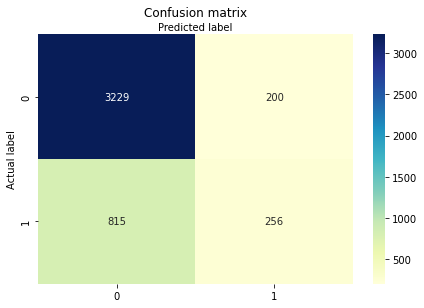

In [47]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, svm.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#####**4. ADA Boost**

In [48]:
# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))



 ---AdaBoost Model---
AdaBoost AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3429
           1       0.94      0.90      0.92      1071

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



Text(0.5, 257.44, 'Predicted label')

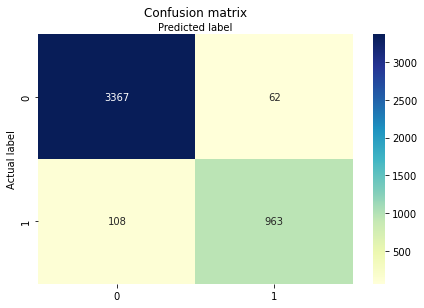

In [49]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, ada.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(ada.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 96.22


In [51]:
ada.fit(X_train, y_train) # fit optimised model to the training data
probs = ada.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
ada_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % ada_roc_auc)

AUC score: 0.983


#####**5. XG Boost**

In [52]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)
print ("\n\n ---xgboost Model---")
xgboost_roc_auc = roc_auc_score(y_test, xgboost.predict(X_test))
print ("xgboost AUC = %2.2f" % xgboost_roc_auc)
print(classification_report(y_test, xgboost.predict(X_test)))



 ---xgboost Model---
xgboost AUC = 0.96
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3429
           1       0.96      0.93      0.94      1071

    accuracy                           0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



Text(0.5, 257.44, 'Predicted label')

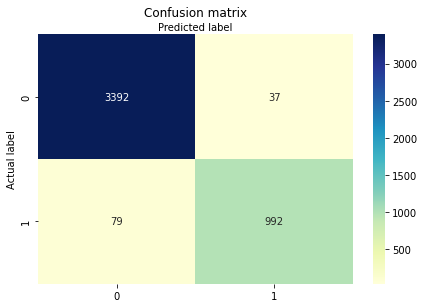

In [53]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, xgboost.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(xgboost.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 97.42


In [55]:
xgboost.fit(X_train, y_train) # fit optimised model to the training data
probs = xgboost.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
xgboost_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % xgboost_roc_auc)

AUC score: 0.988


#####**6. Decision Tree**

In [56]:
# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
Decision Tree AUC = 0.94
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3429
           1       0.92      0.91      0.91      1071

    accuracy                           0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500



Text(0.5, 257.44, 'Predicted label')

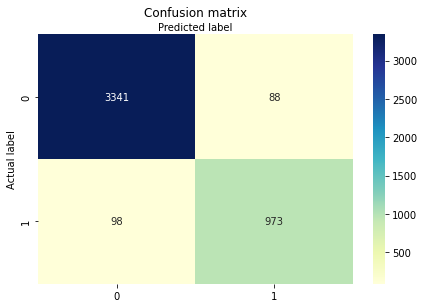

In [57]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, dtree.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 95.87


In [59]:
dtree.fit(X_train, y_train) # fit optimised model to the training data
probs = dtree.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
dtree_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % dtree_roc_auc)

AUC score: 0.980


####**ROC GRAPH**

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

*True Positive Rate*

*False Positive Rate*

To choose the best perfoming model, we use the AUC(**Area Under the ROC Curve**). AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. 

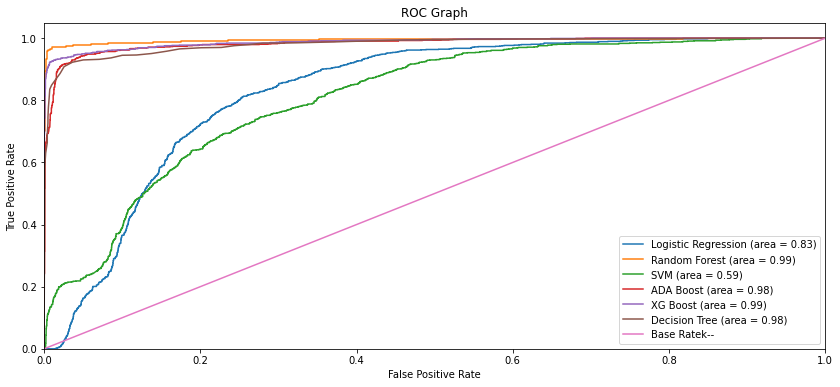

In [60]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
xgboost_fpr, xgboost_tpr, xgboost_thresholds = roc_curve(y_test, xgboost.predict_proba(X_test)[:,1])
dtree_fpr, dtree_tpr, dtree_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Random Forest ROC
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
# Plot Random Forest ROC
plt.plot(ada_fpr, ada_tpr, label='ADA Boost (area = %0.2f)' % ada_roc_auc)
# Plot Random Forest ROC
plt.plot(xgboost_fpr, xgboost_tpr, label='XG Boost (area = %0.2f)' % xgboost_roc_auc)
# Plot Random Forest ROC
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree (area = %0.2f)' % dtree_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

####**Deep Learning Models**

In this section, we introduce deep learning algorithms, though they are not so approriate to solve the problem at hand. However deep learning algorithms are more prefered over machine learning algorithms based on Decision Boundary and Feature Engineering.

#####**Decision Boundary**
For a classification problem, the algorithm learns a function that seperates two classes, as such a machine learning algorithm such as a logistic regression learns the function that maps the input to the output, the learning function in this case is the *Sigmoid function*. The shortcoming of this tradional machine learning algorithm is that it only learns the linear decision boundaries and can not learn any non linear data. Therefore, preference of deep learning algorithms that can equally learn all functions.

#####**Feature Engineering**
Feature engineering involves feature extraction and feature selection, and these processes are automaticall done in deep learning.

However, it is not all problems that can be solved using deep learning algorithms. The Artificial Neural Network can be use to solve problems related to, Tabular data, Image data, and Text data. This network is able to learn the non-linear relationship in the data. Recurrent Neural Network is used to solve problems related to Time series data, Text data, and audio data. This network is able to capture sequetial information in the data. Finally the Convolution Neural Network are developed to solve problems related to Image data, but they also perfom better in sequential data.

In [61]:
import keras
from keras.layers import LSTM, SimpleRNN
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense,Dropout, Flatten,RepeatVector,TimeDistributed
from keras.callbacks import EarlyStopping
#from keras.optimizers import adam
#from livelossplot.keras import PlotLossesCallback

#####**1. Artificial Neural Network**

In [62]:
model_ANN = Sequential()
model_ANN.add(Dense(13, input_shape=(X_train.shape[1],), activation='relu'))
model_ANN.add(Dense(16, activation='relu')),
model_ANN.add(Dense(16, activation='relu')),
model_ANN.add(Dense(1, activation = 'sigmoid'))
model_ANN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                273       
                                                                 
 dense_1 (Dense)             (None, 16)                224       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 786
Trainable params: 786
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_ANN.fit(X_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model_ANN.evaluate(X_test, y_test)

Epoch 1/50
10499/10499 [==============================] - 16s 1ms/step - loss: 0.4584 - accuracy: 0.7980
Epoch 2/50
10499/10499 [==============================] - 16s 1ms/step - loss: 0.4078 - accuracy: 0.8340
Epoch 3/50
10499/10499 [==============================] - 15s 1ms/step - loss: 0.2905 - accuracy: 0.8963
Epoch 4/50
10499/10499 [==============================] - 16s 1ms/step - loss: 0.2506 - accuracy: 0.9325
Epoch 5/50
10499/10499 [==============================] - 16s 1ms/step - loss: 0.2495 - accuracy: 0.9384
Epoch 6/50
10499/10499 [==============================] - 15s 1ms/step - loss: 0.2653 - accuracy: 0.9382
Epoch 7/50
10499/10499 [==============================] - 15s 1ms/step - loss: 0.2698 - accuracy: 0.9364
Epoch 8/50
10499/10499 [==============================] - 16s 2ms/step - loss: 0.2833 - accuracy: 0.9379
Epoch 9/50
10499/10499 [==============================] - 15s 1ms/step - loss: 0.2884 - accuracy: 0.9387
Epoch 10/50
10499/10499 [==============================

#####**2. Convolution Neural Network**

In [64]:


# define model
model_CNN = Sequential()
model_CNN.add(Conv1D(filters=5, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model_CNN.add(MaxPooling1D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(50, activation='relu'))
model_CNN.add(Dense(1, activation = 'sigmoid'))
model_CNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 5)             15        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 5)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 45)                0         
                                                                 
 dense_4 (Dense)             (None, 50)                2300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,366
Trainable params: 2,366
Non-trainable params: 0
____________________________________________________

In [65]:
nb_epoch = 100

model_CNN.fit(X_train, y_train, 
          validation_split = 0.2, 
          epochs=100, 
          shuffle = True,
          batch_size=16,
          verbose=1,)

Epoch 1/100
525/525 [==============================] - 3s 4ms/step - loss: 0.5142 - accuracy: 0.7645 - val_loss: 0.5018 - val_accuracy: 0.7505
Epoch 2/100
525/525 [==============================] - 2s 4ms/step - loss: 0.4600 - accuracy: 0.7675 - val_loss: 0.4541 - val_accuracy: 0.7552
Epoch 3/100
525/525 [==============================] - 2s 4ms/step - loss: 0.4077 - accuracy: 0.7996 - val_loss: 0.4029 - val_accuracy: 0.8143
Epoch 4/100
525/525 [==============================] - 2s 3ms/step - loss: 0.3557 - accuracy: 0.8415 - val_loss: 0.3485 - val_accuracy: 0.8533
Epoch 5/100
525/525 [==============================] - 1s 3ms/step - loss: 0.3046 - accuracy: 0.8834 - val_loss: 0.3022 - val_accuracy: 0.8895
Epoch 6/100
525/525 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9048 - val_loss: 0.2697 - val_accuracy: 0.9048
Epoch 7/100
525/525 [==============================] - 1s 3ms/step - loss: 0.2397 - accuracy: 0.9178 - val_loss: 0.2549 - val_accuracy: 0.9081

In [66]:
results = model_CNN.evaluate(X_test, y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.9467


In [67]:
# predict test set
pred_y_CNN = model_CNN.predict(X_test)
pred_y_CNN

array([[9.5359010e-01],
       [5.7438314e-03],
       [2.8724670e-03],
       ...,
       [4.9491183e-10],
       [9.6275491e-01],
       [8.1392527e-03]], dtype=float32)

#####**3. Recurrent Neural Network**

In [68]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(units=100, input_shape=(X_train.shape[1], 1))) #input_shape takes time steps and features
model_RNN.add(Dense(1, activation = 'sigmoid'))

model_RNN.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_RNN.fit(X_train, y_train, epochs=50, batch_size=1)
test_loss, test_acc = model_RNN.evaluate(X_test, y_test)

Epoch 1/50
10499/10499 [==============================] - 46s 4ms/step - loss: 0.4148 - accuracy: 0.8348
Epoch 2/50
10499/10499 [==============================] - 47s 4ms/step - loss: 0.3326 - accuracy: 0.8835
Epoch 3/50
10499/10499 [==============================] - 44s 4ms/step - loss: 0.3769 - accuracy: 0.8648
Epoch 4/50
10499/10499 [==============================] - 42s 4ms/step - loss: 0.3747 - accuracy: 0.8749
Epoch 5/50
10499/10499 [==============================] - 42s 4ms/step - loss: 0.4451 - accuracy: 0.8296
Epoch 6/50
10499/10499 [==============================] - 43s 4ms/step - loss: 0.4563 - accuracy: 0.8249
Epoch 7/50
10499/10499 [==============================] - 45s 4ms/step - loss: 0.4719 - accuracy: 0.8120
Epoch 8/50
10499/10499 [==============================] - 45s 4ms/step - loss: 0.4358 - accuracy: 0.8217
Epoch 9/50
10499/10499 [==============================] - 49s 5ms/step - loss: 0.4222 - accuracy: 0.8374
Epoch 10/50
10499/10499 [==============================

####**Model Selection**

We restrict this problem to using a machine learning algorithm, we can therefore choose the best perfoming as follows;

In [94]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )))
models.append(('SVM', SVC(kernel='linear',random_state=7, probability=True)))
models.append(('ADA Boost', AdaBoostClassifier(n_estimators=400, learning_rate=0.1)))
models.append(('XG Boost', XGBClassifier()))
models.append(('Decision Tree Classifier',
               tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )))

In [95]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,99.20,0.45,98.32,0.44
4,XG Boost,98.72,0.54,97.45,0.49
3,ADA Boost,98.05,0.59,95.76,0.54
5,Decision Tree Classifier,97.79,0.77,96.35,0.60
0,Logistic Regression,82.81,1.10,75.88,1.09
2,SVM,80.73,1.10,78.03,1.20


The best performing model is the random forest, which we can furthermore analyse and fine tune the parameters, and deploy to the client.

####**Saving the Model**

In [109]:
import pickle

In [110]:
# save the model to disk
filename = 'HR_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [111]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9833333333333333
